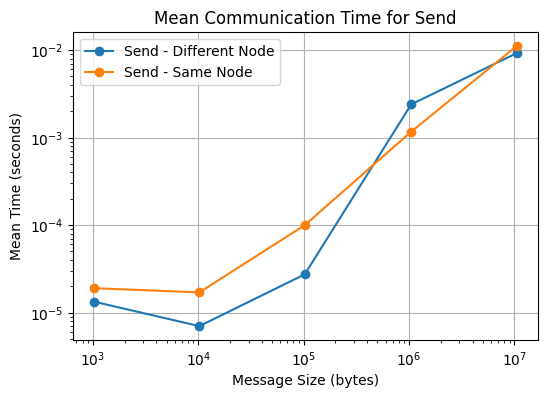

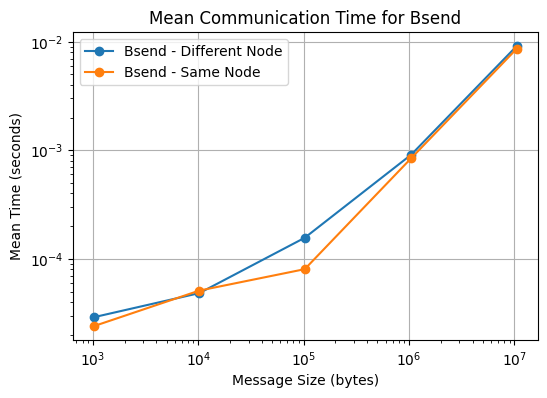

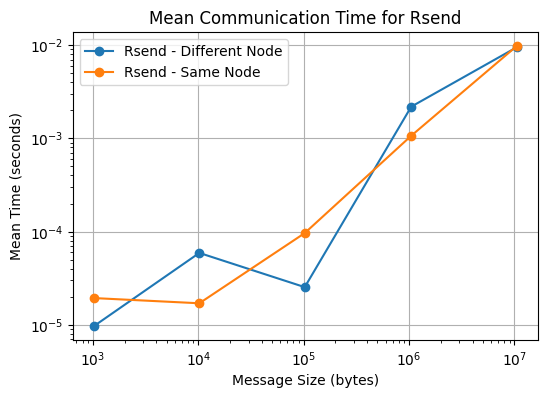

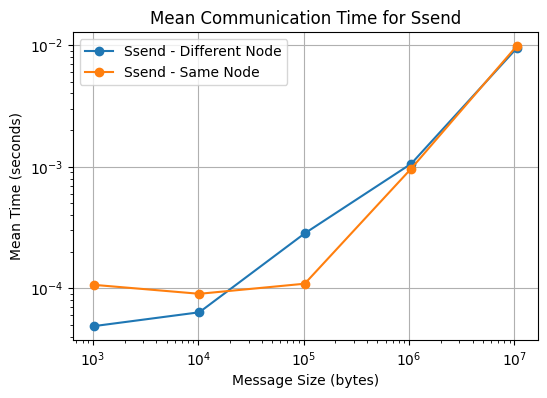

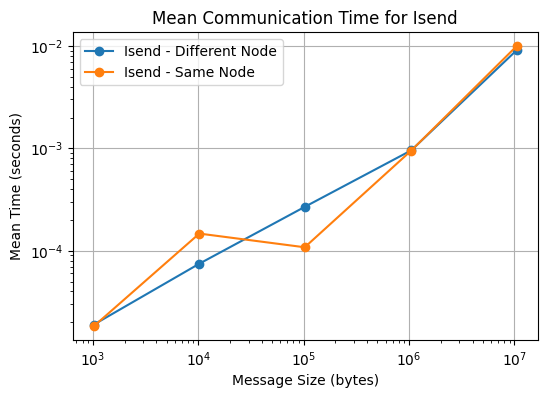

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

def parse_output_file(filepath):
    times = []
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith('Send'):
                parts = line.split()
                size = int(parts[1])
                time = float(parts[4])
                times.append((size, time))
    return times

def calculate_mean_times(folder_path, send_type, node_type):
    mean_times = {}
    for i in range(1, 4):  # Loop over the .out files 1, 2, and 3
        file_path = os.path.join(folder_path, f'P2P_{send_type}_Recv', f'P2P_{node_type}_{i}.out')
        times = parse_output_file(file_path)
        for size, time in times:
            if size not in mean_times:
                mean_times[size] = []
            mean_times[size].append(time)
    # Calculate mean time for each message size
    for size in mean_times:
        mean_times[size] = np.mean(mean_times[size])
    return mean_times

def plot_mean_times(send_types, node_types, folder_path):

    for send_type in send_types:
        plt.figure(figsize=(6, 4))
        for node_type in node_types:
            if node_type == 'differentnode':
                node_name = 'Different Node'
            else:
                node_name = 'Same Node'
            mean_times = calculate_mean_times(folder_path, send_type, node_type)
            sizes = sorted(mean_times.keys())
            means = [mean_times[size] for size in sizes]
            plt.plot(sizes, means, marker='o', label=f'{send_type} - {node_name}')
        plt.xlabel('Message Size (bytes)')
        plt.ylabel('Mean Time (seconds)')
        

        plt.title(f'Mean Communication Time for {send_type}')
        plt.legend()
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True)
        plt.show()

# Example usage:
folder_path = './'  # Replace with your actual folder path
send_types = ['Send', 'Bsend', 'Rsend', 'Ssend', 'Isend']
node_types = ['differentnode', 'samenode']

plot_mean_times(send_types, node_types, folder_path)